# Explore here

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


In [50]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")


In [51]:
#Se carga el dataset y se realiza una revision general de la data.
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [52]:
df_raw.sample(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
3045,55001,20348,1461,7.180067,1795,8.821506,1757,8.634755,1977,9.715943,...,1685,14.0,12.8,15.2,2439,4.0,3.7,4.4,700,6
2761,48481,41619,5760,13.839833,6080,14.608712,5217,12.535140,5054,12.143492,...,2652,15.6,14.8,16.5,4820,3.8,3.6,4.1,1181,5
1522,29083,21792,2659,12.201725,2592,11.894273,2285,10.485499,2466,11.316079,...,1954,14.0,12.9,15.2,2383,3.7,3.4,4.0,626,6
652,17119,264461,31217,11.804009,32601,12.327337,33282,12.584842,34517,13.051830,...,17053,10.6,9.8,11.5,22006,3.0,2.8,3.3,6269,2
2365,46013,39316,5272,13.409299,5224,13.287211,5315,13.518669,5233,13.310103,...,1699,10.3,9.4,11.2,3076,2.9,2.7,3.2,875,5
1430,28063,7106,944,13.284548,817,11.497326,984,13.847453,891,12.538700,...,718,24.0,22.4,25.4,1320,5.7,5.2,6.1,311,6
2232,41053,85234,10342,12.133656,12023,14.105873,13172,15.453927,10017,11.752352,...,4959,10.6,9.6,11.4,6945,3.0,2.8,3.3,1994,3
858,19143,6040,741,12.268212,824,13.642384,578,9.569536,639,10.579470,...,366,11.9,10.8,12.9,547,3.4,3.1,3.7,156,6
311,9011,266784,27079,10.150159,31742,11.898015,37701,14.131657,32424,12.153652,...,14489,10.2,9.3,11.1,22006,2.8,2.6,3.0,5951,3
3004,54029,29094,2829,9.723654,3210,11.033203,2978,10.235787,3095,10.637932,...,3090,15.3,14.1,16.5,3613,3.7,3.4,3.9,862,4


In [53]:
#Es visible que algunas de las variables en el dataset son dependientes de otras. Por ejemplo columnas como "0-9" y "0-9 y/o % of total pop" Por 
# lo que debe incluirse este dato al momento de seleccionar las columnas.

In [54]:
df_raw.to_csv("../data/raw/data_raw.csv")

In [55]:
df_processed = df_raw.copy()

In [56]:
#Se realiza una inspeccion de las columnas presentes en el dataset.
column_list = df_processed.columns.to_list()

column_list

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [57]:
# df_processed[""]
df_processed.rename(columns = {'19-Oct':'10-19'}, inplace = True)

In [58]:
column_list = df_processed.columns.to_list()

column_list

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '10-19',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or h

In [59]:
#Se seleccionan las variables independientes que podrían aportar más informacion, todas ellas numericas

df_interin = df_processed[["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80+","% White-alone","% Black-alone","% NA/AI-alone","% Asian-alone","% Hawaiian/PI-alone","Less than a high school diploma 2014-18","High school diploma only 2014-18","Bachelor's degree or higher 2014-18","MEDHHINC_2018","Employed_2018","Unemployed_2018","Active Physicians per 100000 Population 2018 (AAMC)","Obesity_prevalence","diabetes_prevalence","CKD_prevalence","COPD_prevalence","POVALL_2018","Heart disease_prevalence"]]

In [60]:
df_interin.describe().T

,count,mean,std,min,25%,50%,75%,max
0-9,3140.0,12740.302866,41807.301846,0.000000,1280.500000,3057.000000,8097.000000,1.208253e+06
10-19,3140.0,13367.976752,42284.392134,0.000000,1374.500000,3274.000000,8822.250000,1.239139e+06
20-29,3140.0,14469.331529,49577.725396,0.000000,1263.750000,3108.000000,8976.250000,1.557073e+06
30-39,3140.0,13916.490127,48990.951710,11.000000,1232.750000,3000.500000,8314.250000,1.501844e+06
40-49,3140.0,12885.214331,43472.189993,4.000000,1245.250000,3048.500000,8120.500000,1.350076e+06
50-59,3140.0,13638.031529,42720.629434,14.000000,1483.000000,3515.500000,9157.250000,1.306003e+06
60-69,3140.0,11916.213057,34518.581878,20.000000,1476.500000,3410.000000,8710.500000,1.014325e+06
70-79,3140.0,7220.310510,20287.498429,6.000000,950.750000,2177.000000,5574.000000,5.725300e+05
80+,3140.0,4035.541720,12063.782251,0.000000,533.000000,1160.000000,2899.750000,3.562750e+05
% White-alone,3140.0,84.494109,16.348987,3.841985,79.620473,91.410189,95.521727,9.904378e+01


In [61]:
df_interin.select_dtypes('number').corr().style.background_gradient(cmap='Blues')

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,Less than a high school diploma 2014-18,High school diploma only 2014-18,Bachelor's degree or higher 2014-18,MEDHHINC_2018,Employed_2018,Unemployed_2018,Active Physicians per 100000 Population 2018 (AAMC),Obesity_prevalence,diabetes_prevalence,CKD_prevalence,COPD_prevalence,POVALL_2018,Heart disease_prevalence
0-9,1.000000,0.997487,0.989992,0.990971,0.991905,0.985749,0.979333,0.961958,0.946346,-0.156263,0.090312,-0.039405,0.464069,0.034929,0.946713,0.973324,0.947922,0.266013,0.988804,0.980304,0.146373,-0.233481,-0.167495,-0.216430,-0.253851,0.970050,-0.302992
10-19,0.997487,1.000000,0.988552,0.987298,0.992803,0.988988,0.982460,0.966966,0.951206,-0.151108,0.085954,-0.042076,0.466383,0.032371,0.941898,0.972866,0.949457,0.279487,0.990084,0.980247,0.153894,-0.244549,-0.178421,-0.226956,-0.260600,0.962676,-0.311823
20-29,0.989992,0.988552,1.000000,0.995803,0.991338,0.986506,0.981665,0.964468,0.955231,-0.158644,0.092785,-0.040374,0.467676,0.033503,0.952755,0.968700,0.961699,0.251673,0.992286,0.983038,0.159569,-0.247443,-0.175033,-0.219593,-0.253190,0.972097,-0.304290
30-39,0.990971,0.987298,0.995803,1.000000,0.995385,0.988790,0.983050,0.965318,0.955137,-0.157205,0.088565,-0.039967,0.479933,0.034177,0.948777,0.968551,0.970641,0.268507,0.995252,0.981297,0.157943,-0.247318,-0.170921,-0.215739,-0.251209,0.965289,-0.298536
40-49,0.991905,0.992803,0.991338,0.995385,1.000000,0.996229,0.989045,0.974370,0.963603,-0.150962,0.083884,-0.042980,0.479834,0.032044,0.949198,0.973548,0.969192,0.283480,0.997418,0.983027,0.158844,-0.250376,-0.171510,-0.217762,-0.249727,0.958807,-0.297484
50-59,0.985749,0.988988,0.986506,0.988790,0.996229,1.000000,0.996358,0.985032,0.977812,-0.151358,0.086051,-0.046412,0.480258,0.030808,0.940256,0.981409,0.969900,0.293244,0.996251,0.980728,0.184654,-0.260781,-0.177161,-0.220956,-0.251045,0.952911,-0.299648
60-69,0.979333,0.982460,0.981665,0.983050,0.989045,0.996358,1.000000,0.993717,0.986548,-0.150112,0.085311,-0.048916,0.478807,0.033664,0.927388,0.984756,0.967485,0.289337,0.991836,0.976082,0.195129,-0.272592,-0.180107,-0.217976,-0.249446,0.950705,-0.296324
70-79,0.961958,0.966966,0.964468,0.965318,0.974370,0.985032,0.993717,1.000000,0.993476,-0.142063,0.079386,-0.050415,0.467874,0.033997,0.910758,0.978348,0.953889,0.283130,0.977661,0.961170,0.196528,-0.278248,-0.171794,-0.202424,-0.236959,0.935693,-0.277776
80+,0.946346,0.951206,0.955231,0.955137,0.963603,0.977812,0.986548,0.993476,1.000000,-0.137237,0.074990,-0.049353,0.463761,0.033103,0.909713,0.970545,0.951754,0.271834,0.968502,0.953036,0.206679,-0.272228,-0.165779,-0.192883,-0.230521,0.927030,-0.266539
% White-alone,-0.156263,-0.151108,-0.158644,-0.157205,-0.150962,-0.151358,-0.150112,-0.142063,-0.137237,1.000000,-0.828582,-0.402107,-0.246722,-0.120163,-0.128063,-0.153390,-0.158356,0.162865,-0.150249,-0.146545,0.106708,-0.238957,-0.410392,-0.308305,-0.056862,-0.167664,-0.011185


In [62]:
#Se nota mucha correlacion ente algunas variables. Por ejemplo entre las variables que representan la edad de los pacientes. Se prueba el modelo sin considerar esta correlacion.

In [63]:
#Se crean los datasets de entrenamiento y testing
X = df_interin.drop(["Heart disease_prevalence"], axis= 1)
y = df_interin["Heart disease_prevalence"]

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1010)

In [65]:
#Se crea el data set de entrenamiento
df_train = pd.concat([X_train, y_train], axis=1)

In [66]:
df_train.sample(10)

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,% White-alone,...,MEDHHINC_2018,Employed_2018,Unemployed_2018,Active Physicians per 100000 Population 2018 (AAMC),Obesity_prevalence,diabetes_prevalence,CKD_prevalence,COPD_prevalence,POVALL_2018,Heart disease_prevalence
1994,310,256,217,238,201,272,323,183,100,95.904762,...,63261,1052,26,237.6,35.3,11.5,3.2,7.2,195,8.3
2205,2761,2661,2682,2835,2461,2440,2158,1436,788,90.871328,...,55134,9030,256,206.7,34.9,11.5,2.9,8.1,2816,7.9
3021,1340,1526,1239,1375,1566,1914,1968,1625,727,97.048193,...,38171,5500,277,263.4,37.8,16.7,3.9,14.5,1960,12.1
2540,53354,53508,46195,55847,51708,45813,35670,19091,9014,75.336845,...,74225,168025,7964,224.8,35.7,11.5,2.7,5.7,36342,6.0
1976,434,417,553,581,503,547,507,360,229,56.693295,...,36765,1365,92,255.0,38.0,17.2,4.3,10.9,880,10.3
53,2107,2261,2602,2524,2371,2923,2568,1671,911,57.829271,...,37586,7449,356,217.1,41.9,18.0,4.2,11.1,4177,10.1
2712,616,571,489,526,477,431,354,169,108,92.782678,...,65273,1849,47,224.8,39.3,13.8,3.2,6.4,371,7.1
2949,971,2839,4137,1418,995,1342,1485,1080,629,73.194146,...,52845,6458,271,263.2,27.4,8.9,2.5,5.7,2437,5.7
3014,6275,6711,8021,6481,6774,6976,7404,4756,2699,94.065636,...,46244,23730,1439,263.4,37.9,14.6,3.4,12.0,9084,9.9
1047,7093,7428,7375,6518,6988,7056,6018,3488,1956,91.769288,...,59443,25465,960,230.9,36.1,12.7,3.1,10.3,6562,8.5


In [67]:
df_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
0-9,2512.0,13272.543790,44466.316303,0.000000,1249.750000,3054.000000,8492.750000,1.208253e+06
10-19,2512.0,13925.644904,45096.359364,0.000000,1348.750000,3247.500000,9353.250000,1.239139e+06
20-29,2512.0,15119.876990,52943.183826,0.000000,1233.000000,3088.000000,9616.500000,1.557073e+06
30-39,2512.0,14520.479697,52146.847166,11.000000,1194.500000,2977.500000,8770.250000,1.501844e+06
40-49,2512.0,13433.235669,46390.398923,9.000000,1179.000000,2999.500000,8529.000000,1.350076e+06
50-59,2512.0,14241.638137,45725.114833,18.000000,1449.000000,3417.000000,9456.250000,1.306003e+06
60-69,2512.0,12437.122611,36934.980710,24.000000,1446.750000,3316.000000,9120.750000,1.014325e+06
70-79,2512.0,7535.541401,21691.273739,6.000000,923.750000,2126.500000,5681.000000,5.725300e+05
80+,2512.0,4236.546576,12947.282053,20.000000,527.000000,1127.500000,2940.250000,3.562750e+05
% White-alone,2512.0,84.486960,16.419479,3.841985,79.578697,91.424295,95.531609,9.904378e+01


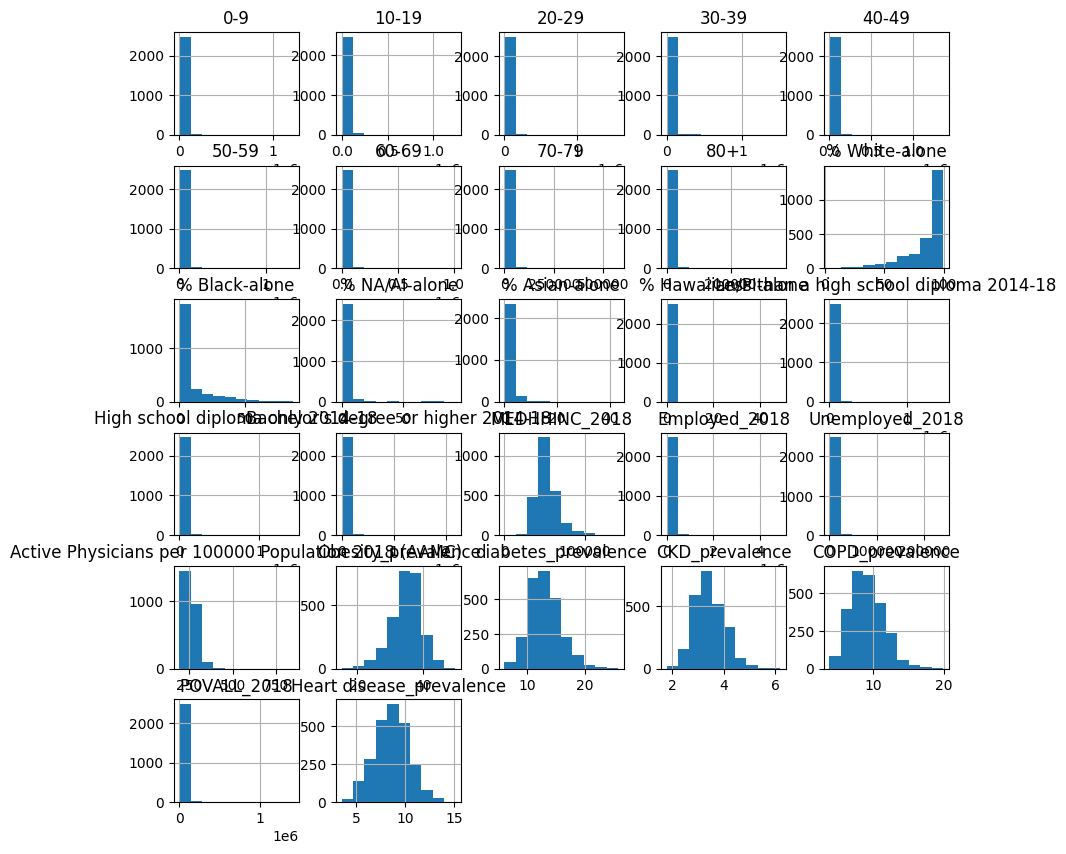

In [68]:
df_train.hist(figsize=(10,10))
plt.show()

In [69]:
#Algunas de las variables cuentan con distribuciones en forma de campana, por lo cual es recomendable aplicar el Standard Scaler. Por otra parte la proporcion entre algunas de las
#variables independes para valores maximos y la media es sumamente alta. Por lo cual se decide escalar las variables numericas seleccionadas

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
model_linear_reggresion = LinearRegression()

In [72]:
model_linear_reggresion.fit(X_train_scaled, y_train)

LinearRegression()

In [73]:
print(f"Intercept (a): {model_linear_reggresion.intercept_}")
print(f"Coefficients (b): {model_linear_reggresion.coef_}")

Intercept (a): 8.592675159235668
Coefficients (b): [ 0.40128189 -0.73283958  0.23987134 -0.65179067  0.30739262  0.1683233
 -0.39228765  0.26862746 -0.17398688 -0.46405115 -0.77473832 -0.33592266
 -0.11815418 -0.06106475  0.05513648  0.28306091  0.36036409  0.05425884
 -0.00906103 -0.045891   -0.0837072   0.08095548 -0.24718876  1.32644122
  0.79236336 -0.09146384]


In [74]:
y_hat_linear_regression = model_linear_reggresion.predict(X_test_scaled)

In [75]:
print(f"Mean squared error: {mean_squared_error(y_test, y_hat_linear_regression):.6f}")
print(f"Coefficient of determination: {r2_score(y_test, y_hat_linear_regression):.6f}")

Mean squared error: 0.127038
Coefficient of determination: 0.958530


In [76]:
#Se aplica el modelo de Lasso para comparar con el modelo de Regresion Lineal

In [77]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1030)

In [78]:
model_lassocv = LassoCV(alphas=np.arange(0,1,0.05),cv=cv,n_jobs=-1)

In [79]:
model_lassocv.fit(X_train_scaled,y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142.11777116362282, tolerance: 0.7056989358407083
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:6

LassoCV(alphas=array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1030),
        n_jobs=-1)

In [80]:
model_lassocv.alpha_

0.0

In [81]:
y_hat_lassocv = model_lassocv.predict(X_test_scaled)

In [82]:
print(f'MSE: {mean_squared_error(y_test, y_hat_lassocv):.6f}')
print(f'R2: {r2_score(y_test,y_hat_lassocv):.6f}')

MSE: 0.127184
R2: 0.958483


In [83]:
#Se logra observar que para este data set, el Linear Regression Comun logra brindar mejores resultados.

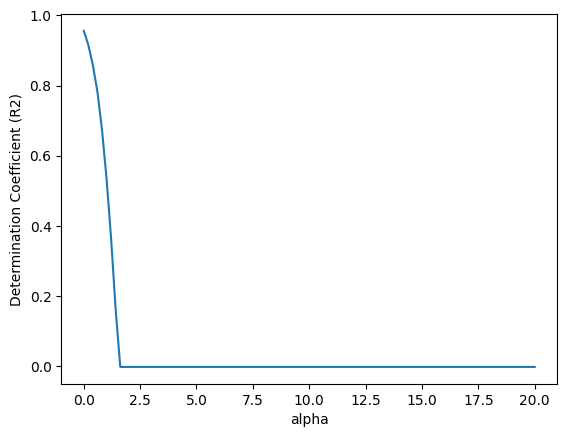

In [84]:
#Se prueba con diferentes valores para alpha:

alphas = np.linspace(0.01,20,100)
lasso = Lasso()
r2_scores = []

for _alpha in alphas:
    lasso.set_params(alpha=_alpha)
    lasso.fit(X_train_scaled,y_train)
    y_hat_lasso = lasso.predict(X_test_scaled)
    r2_scores.append(r2_score(y_test,y_hat_lasso))

plt.plot(alphas, r2_scores)
plt.xlabel('alpha')
plt.ylabel('Determination Coefficient (R2)')
plt.show()

In [85]:
# Se puede observar que conforme aumenta el valor de Alpha, el coeficiente de determinación baja, por lo cual el modelo predice mejor con valores de Alpha bajos.
#Previamente se logró determinar con el Cross Validation, que el valor de Alpha optimo es 0.0.